In [ ]:
# !pip install pyswarm
# !pip install pytsp

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import warnings
import random
from google.colab import files
# import pyswarm


warnings.filterwarnings(action='ignore')

eps = 0.001
n_iter = 10 ** 3

def f(x):
    return 1 / (x ** 2 - 3 * x + 2)


x_k = np.array([3 * x / n_iter for x in range(0, n_iter)])
y_k = np.array([-100 + np.random.normal() if f(x) < -100 else
                100 + np.random.normal() if f(x) > 100 else
                f(x) + np.random.normal() for x in x_k])

In [ ]:
def rational_approximate(x, a, b, c, d):
    return (a * x + b) / ((x ** 2) + c * x + d)


def least_squares(x, func=rational_approximate):
    amount = 0
    for i in range(n_iter):
        amount += np.power(func(x_k[i], x[0], x[1], x[2], x[3]) - y_k[i], 2)
    return amount


In [ ]:
def simulated_annealing(func):
    return scipy.optimize.basinhopping(
        func,
        x0=([0.5, 0.5, 0.5, 0.5]),
        minimizer_kwargs={'method': 'BFGS'}
        # full_output=True
    )


def differential_evolution(func):
    return scipy.optimize.differential_evolution(
        func,
        bounds=[(-2, 2), (-2, 2), (-2, 2), (-2, 2)],
        tol=eps
    )


def particle_swarm_optimization(func):
    return pyswarm.pso(
        func,
        lb=[-2, -2, -2, -2],
        ub=[2, 2, 2, 2],
        maxiter=100,
        minstep=eps,
        debug=True
    )


def nelder_mead_search(function):
    return scipy.optimize.minimize(
        function,
        x0=([0.5, 0.5, 0.5, 0.5]),
        method='Nelder-Mead',
        tol=eps
    )


def lev_marq_method(func, x, y):
    return scipy.optimize.curve_fit(
        func,
        xdata=x,
        ydata=y,
        method='lm',
        full_output=True
    )

In [ ]:
print('Rational approximate'
      '\n')
full_for_SA = simulated_annealing(least_squares)
a_SA, b_SA, c_SA, d_SA = full_for_SA.x
print('Simulated Annealing'
      '\nArguments: {:.6f}, {:.6f}, {:.6f}, {:.6f}'.format(a_SA, b_SA, c_SA, d_SA))
print(f'Number of iterations: {full_for_SA.nit},'
      f'\nNumber of function evaluations: {full_for_SA.nfev}'
      f'\n')
full_for_DE = differential_evolution(least_squares)
a_DE, b_DE, c_DE, d_DE = full_for_DE.x
print('Differential evolutions'
      '\nArguments: {:.6f}, {:.6f}, {:.6f}, {:.6f}'.format(a_DE, b_DE, c_DE, d_DE))
print(f'Number of iterations: {full_for_DE.nit},'
      f'\nNumber of function evaluations: {full_for_DE.nfev}'
      f'\n')
full_for_NM = nelder_mead_search(least_squares)
a_NM, b_NM, c_NM, d_NM = full_for_NM.x
print('Nelder - Mead Algorythm'
      '\nArguments: {:.6f}, {:.6f}, {:.6f}, {:.6f}'.format(a_NM, b_NM, c_NM, d_NM))
print(f'Number of iterations: {full_for_NM.nit},'
      f'\nNumber of function evaluations: {full_for_NM.nfev}'
      f'\n')
'''full_for_PSO = particle_swarm_optimization(least_squares)
a_PSO, b_PSO, c_PSO, d_PSO = full_for_PSO[0]
print('Particle Swarm Optimization'
      '\nArguments: {:.6f}, {:.6f}, {:.6f}, {:.6f}'.format(a_PSO, b_PSO, c_PSO, d_PSO))'''

full_for_LM = lev_marq_method(rational_approximate, x_k, y_k)
a_LM, b_LM, c_LM, d_LM = full_for_LM[0]
lev_marq_fev_num = full_for_LM[2]['nfev']
print('\nLevenberg-Marquardt'
      '\nArguments: {:.6f}, {:.6f}, {:.6f}, {:.6f}'.format(a_LM, b_LM, c_LM, d_LM))
print(f'Number of function evaluations: {lev_marq_fev_num}')

Rational approximate

Simulated Annealing
Arguments: -1.001871, 1.002356, -2.000866, 1.000882
Number of iterations: 100,
Number of function evaluations: 66252

Differential evolutions
Arguments: -1.005839, 1.006102, -2.000000, 1.000016
Number of iterations: 148,
Number of function evaluations: 9090

Nelder - Mead Algorythm
Arguments: -1.001957, 1.002441, -2.000865, 1.000881
Number of iterations: 406,
Number of function evaluations: 669


Levenberg-Marquardt
Arguments: -1.004482, 1.004950, -2.000799, 1.000816
Number of function evaluations: 193


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

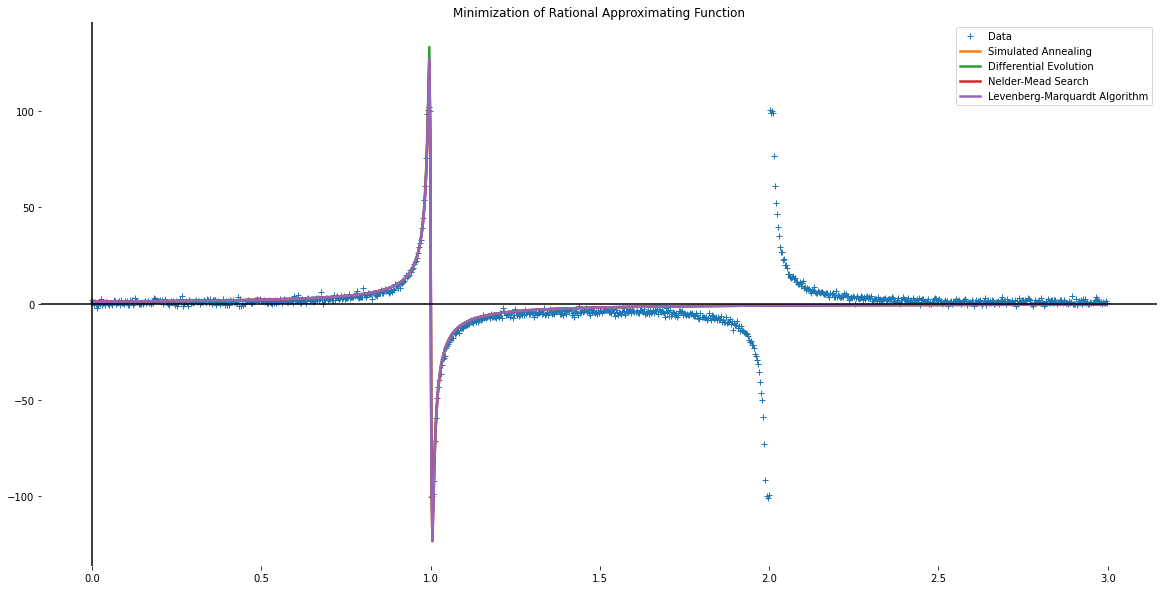

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, "+", label='Data')

y_sa = [rational_approximate(x, a_SA, b_SA, c_SA, d_SA) for x in x_k]
y_de = [rational_approximate(x, a_DE, b_DE, c_DE, d_DE) for x in x_k]
y_nm = [rational_approximate(x, a_NM, b_NM, c_NM, d_NM) for x in x_k]
# y_pso = [rational_approximate(x, a_PSO, b_PSO, c_PSO, d_PSO) for x in x_k]
y_lm = [rational_approximate(x, a_LM, b_LM, c_LM, d_LM) for x in x_k]

y_array = [y_sa, y_de, y_nm, y_lm]
name_array = ['Simulated Annealing', 'Differential Evolution',
              'Nelder-Mead Search',
              'Levenberg-Marquardt Algorithm']
for i in range(len(y_array)):
    plt.plot(x_k, y_array[i], label=name_array[i], linewidth=2.5)
ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Minimization of Rational Approximating Function')
ax.legend()

plt.savefig('rational_approx_task4.1.png', dpi = 200, bbox_inches="tight")
files.download('rational_approx_task4.1.png')

In [ ]:
wg59_data = pd.read_csv("wg59_data.csv")
wg59_data

,name,x,y
0,Augsburg,54,-65
1,Bielefeld,0,71
2,Bochum,-31,53
3,Bremen,8,111
4,Darmstadt,1,-9
5,Essen,-36,52
6,Freiburg,-22,-76
7,Giessen,0,20
8,Hamburg,34,129
9,Hannover,28,84


In [ ]:
def read_coordinates(df):
    coordinates = []
    for index in range(len(df)):
        coordinate = [df.loc[index, 'x'], df.loc[index, 'y']]
        coordinates.append(coordinate)
    return coordinates

def plot(path, points, df, title):
    plt.figure(figsize=(20, 10))
    ax = plt.gca()
    
    x = []
    y = []
    for index, data in enumerate(path[0]):
        x.append(points[data][0])
        y.append(points[data][1])
    
    for index in range(len(df)):
      plt.annotate(df.loc[index, 'name'], (df.loc[index, 'x'] + 1, df.loc[index, 'y'] + 2), fontsize=10)

    ax.scatter(x, y, s=50, c='black')
    plt.text((x[-1]+x[0])/2, (y[-1]+y[0])/2, str(1), size=10)
    plt.arrow(x[-1], y[-1], (x[0]-x[-1]), (y[0]-y[-1]),
              head_width=2, color ='blue', length_includes_head=True)
    
    for i in range(0, len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1]-x[i]), (y[i+1]-y[i]),
                  head_width=2, color='blue', length_includes_head=True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(title, fontsize=15, loc='center')
    
    plt.grid()
    plt.show()

In [ ]:
class Annealing(object):
    def __init__(self, coordinates, T=-1, alpha=-1, stopping_T=-1, stopping_iter=-1, path=wg59_data):
        self.coordinates = coordinates
        self.N = len(coordinates)
        self.T = np.sqrt(self.N) if T == -1 else T
        self.T_save = self.T
        self.alpha = 0.995 if alpha == -1 else alpha
        self.stopping_temperature = 1e-6 if stopping_T == -1 else stopping_T
        self.stopping_iter = 1000000 if stopping_iter == -1 else stopping_iter
        self.iteration = 1
        self.path = path
        
        self.nodes = [i for i in range(self.N)]
        
        self.best_solution = None
        self.best_fitness = float('Inf')
        self.fitness_list = []
    
    def initial_solution(self):
        cur_node = random.choice(self.nodes)
        solution = [cur_node]
        
        free_nodes = set(self.nodes)
        free_nodes.remove(cur_node)
        while free_nodes:
            next_node = min(free_nodes, key=lambda x: self.dist(cur_node, x))
            free_nodes.remove(next_node)
            solution.append(next_node)
            cur_node = next_node
        
        cur_fit = self.fitness(solution)
        if cur_fit < self.best_fitness:
            self.best_fitness = cur_fit
            self.best_solution = solution
        self.fitness_list.append(cur_fit)
        return solution, cur_fit
    
    def dist(self, node_0, node_1):
        coord_0, coord_1 = self.coordinates[node_0], self.coordinates[node_1]
        return np.sqrt((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)
    
    def fitness(self, solution):
        cur_fit = 0
        for i in range(self.N):
            cur_fit = cur_fit + self.dist(solution[i % self.N], solution[(i + 1) % self.N])
        return cur_fit
    
    def p_accept(self, candidate_fitness):
        return np.exp(-abs(candidate_fitness - self.cur_fitness) / self.T)
    
    def accept(self, candidate):
        candidate_fitness = self.fitness(candidate)
        
        if candidate_fitness < self.cur_fitness:
            self.cur_fitness, self.cur_solution = candidate_fitness, candidate
            if candidate_fitness < self.best_fitness:
                self.best_fitness, self.best_solution = candidate_fitness, candidate
        else:
            if random.random() < self.p_accept(candidate_fitness):
                self.cur_fitness, self.cur_solution = candidate_fitness, candidate
    
    def anneal(self):
        self.cur_solution, self.cur_fitness = self.initial_solution()
        
        print('The First Iteration path length:', self.best_fitness)
        plot([self.cur_solution], self.coordinates, self.path, 'The First Iteration')
        
        while self.T >= self.stopping_temperature and self.iteration < self.stopping_iter:
            candidate = list(self.cur_solution)
            l = random.randint(2, self.N - 1)
            i = random.randint(0, self.N - l)
            candidate[i : (i + l)] = reversed(candidate[i : (i + l)])
            self.accept(candidate)
            self.T = self.T * self.alpha
            self.iteration = self.iteration + 1
            
            self.fitness_list.append(self.cur_fitness)
        
        print('The Last Iteration path length:', self.best_fitness)
        plot([self.best_solution], self.coordinates, self.path, 'The Last Iteration')

The First Iteration path length: 1357.0958094835098


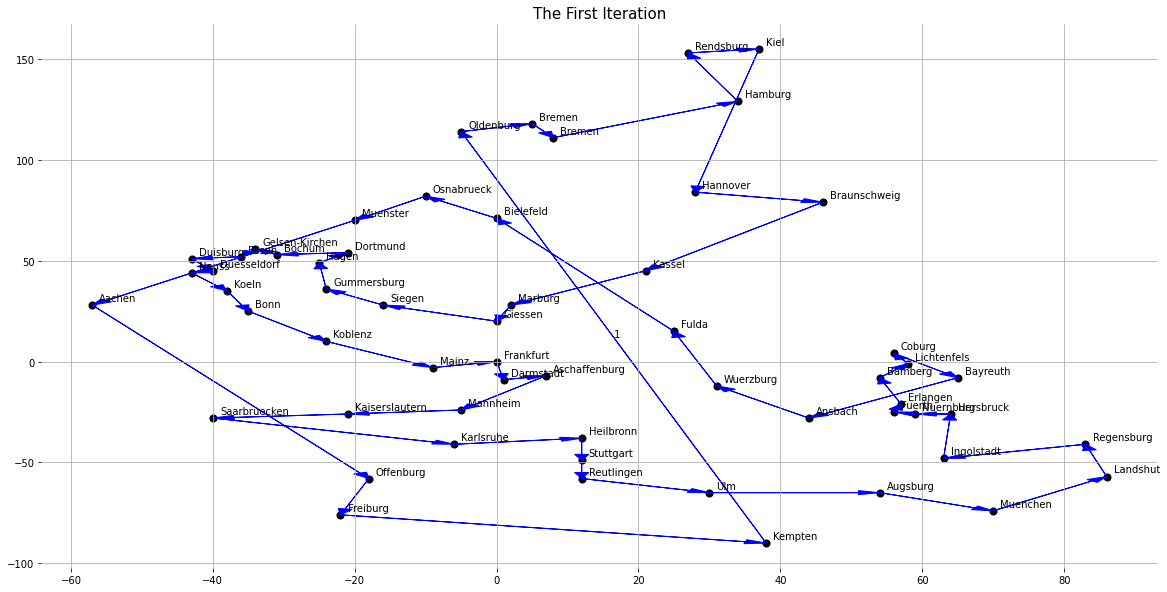

The Last Iteration path length: 1063.9331132730479


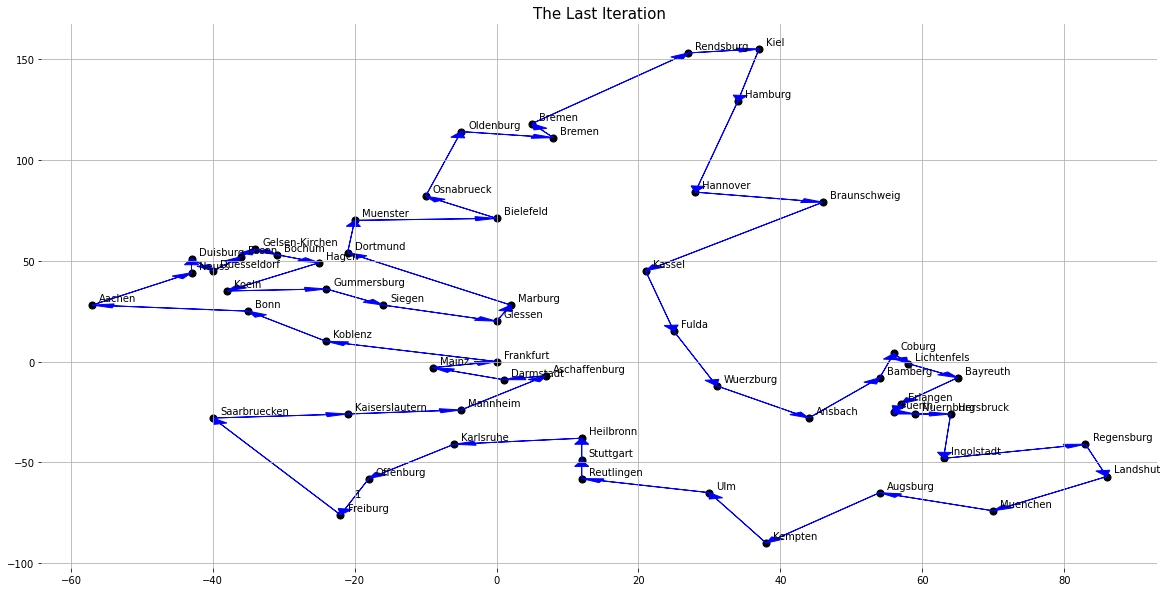

In [ ]:
coordinates = read_coordinates(wg59_data)
simulated_annealing = Annealing(coordinates = coordinates, stopping_iter = 1000000, path = wg59_data)
simulated_annealing.anneal()